In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # seaborn 스타일, 폰트 스타일 지정

import missingno as msno # null 데이터 쉽게 확인

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/tmp/ipykernel_30/1874783762.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. Dataset 확인

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

## 1-1. Null Data Check

In [7]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


- Train, Test에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Ebarked(Train만 0.22%) null data가 존재하는 것을 확인.

<Axes: >

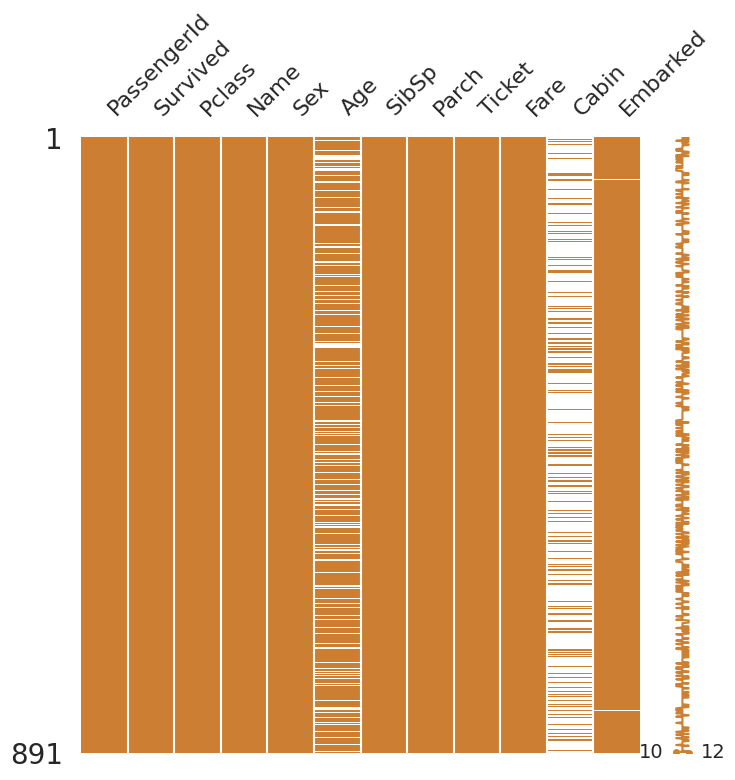

In [9]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<Axes: >

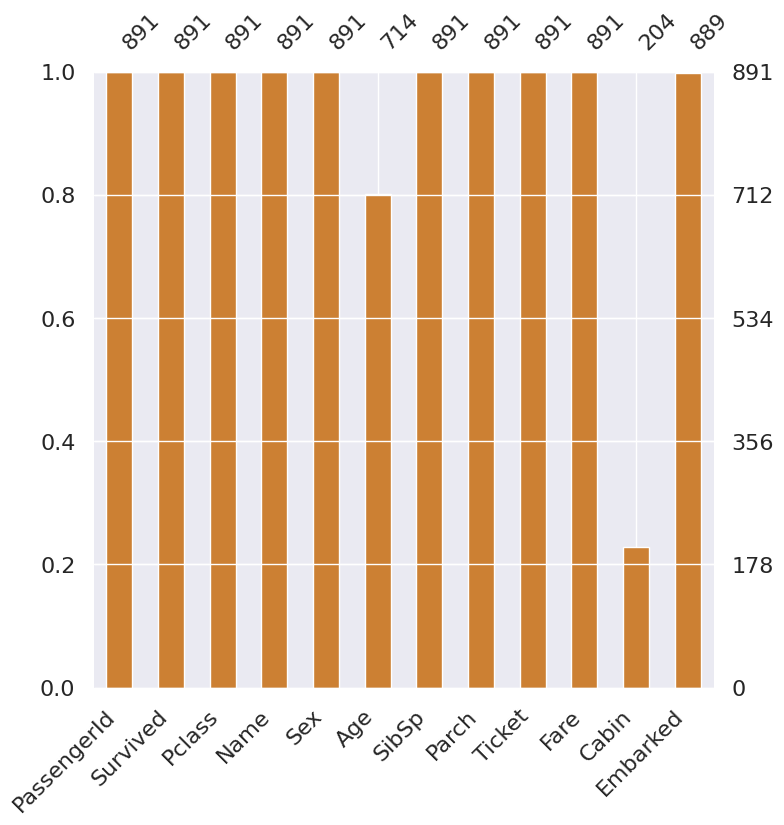

In [10]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<Axes: >

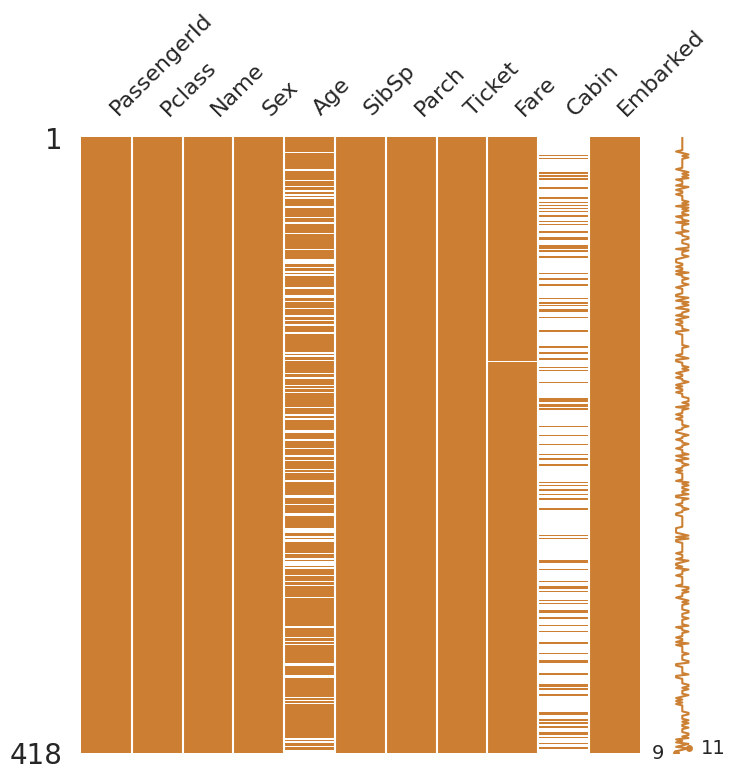

In [11]:
msno.matrix(df=df_test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<Axes: >

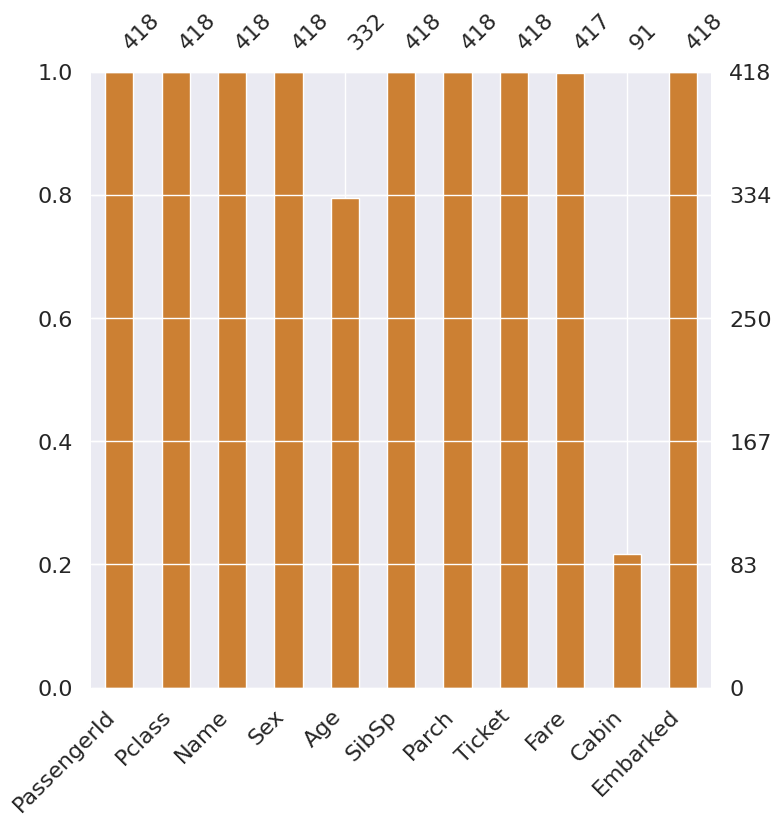

In [12]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

## 1-2. Target Lable 확인

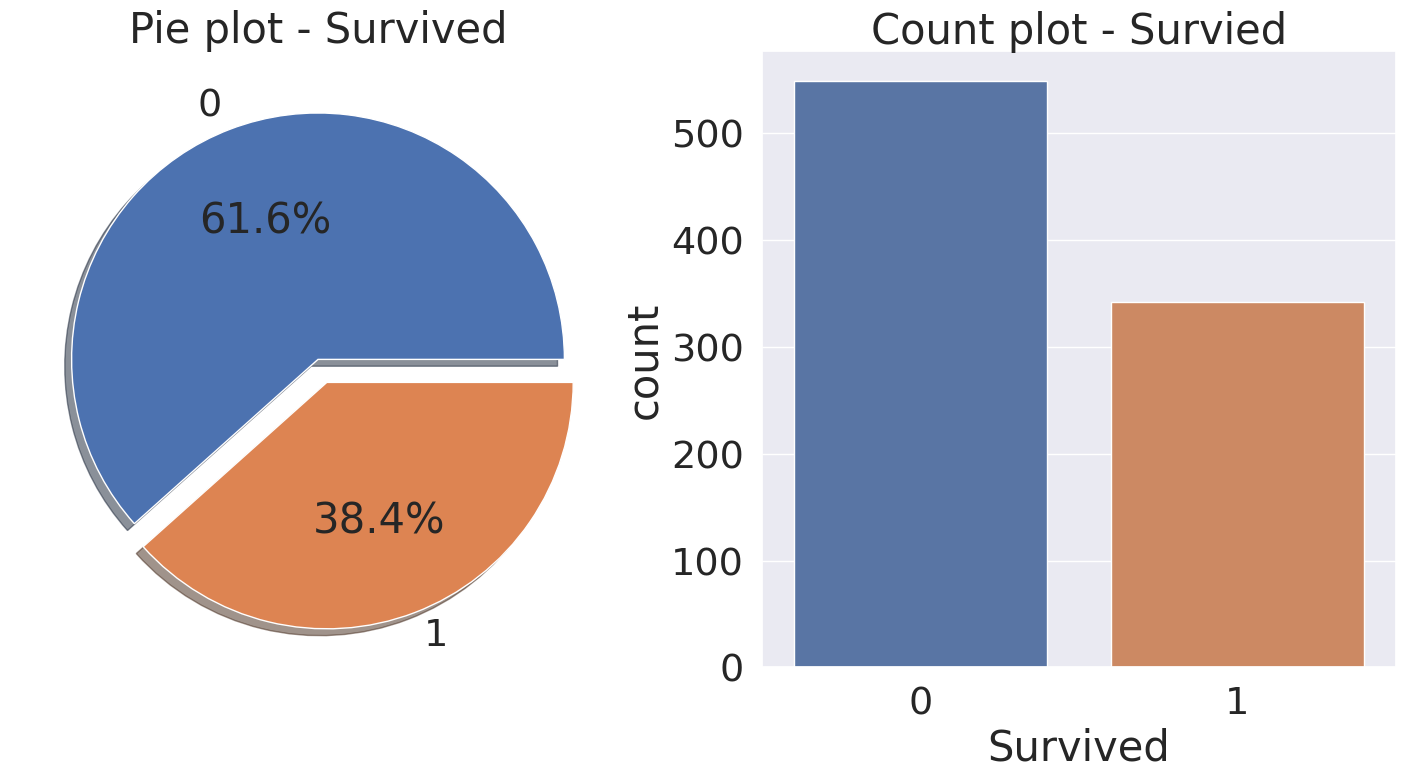

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
# explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도
# autopct : 부채꼴 안에 표시될 숫자의 형식
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survied')

plt.show()

- 생존자 비율 38.4%

# 2. Exploratory data analysis

## 2-1. Pclass

- 서수형 데이터

In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

# groupby 사용해서 보는 것보다 더 수월함.
# pd.crosstab(index,colums)
# margins : 총합 보여줌

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

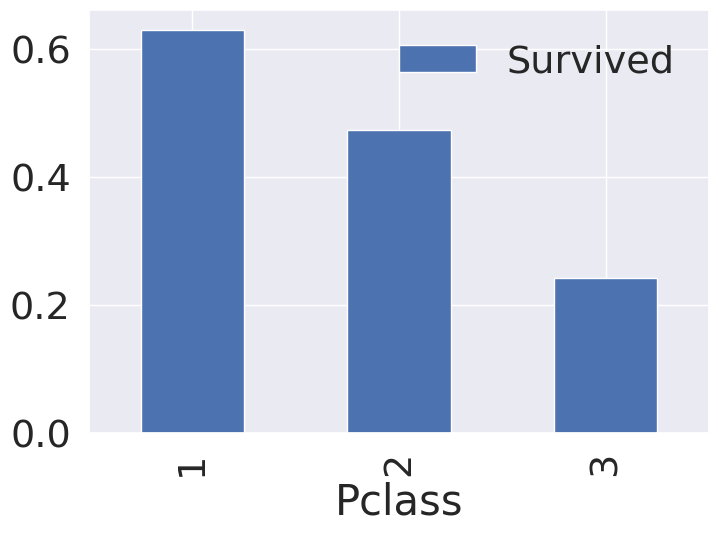

In [17]:
# 클래스별 생존율 확인

df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

- Pclass가 좋을수록 생존률이 높음.

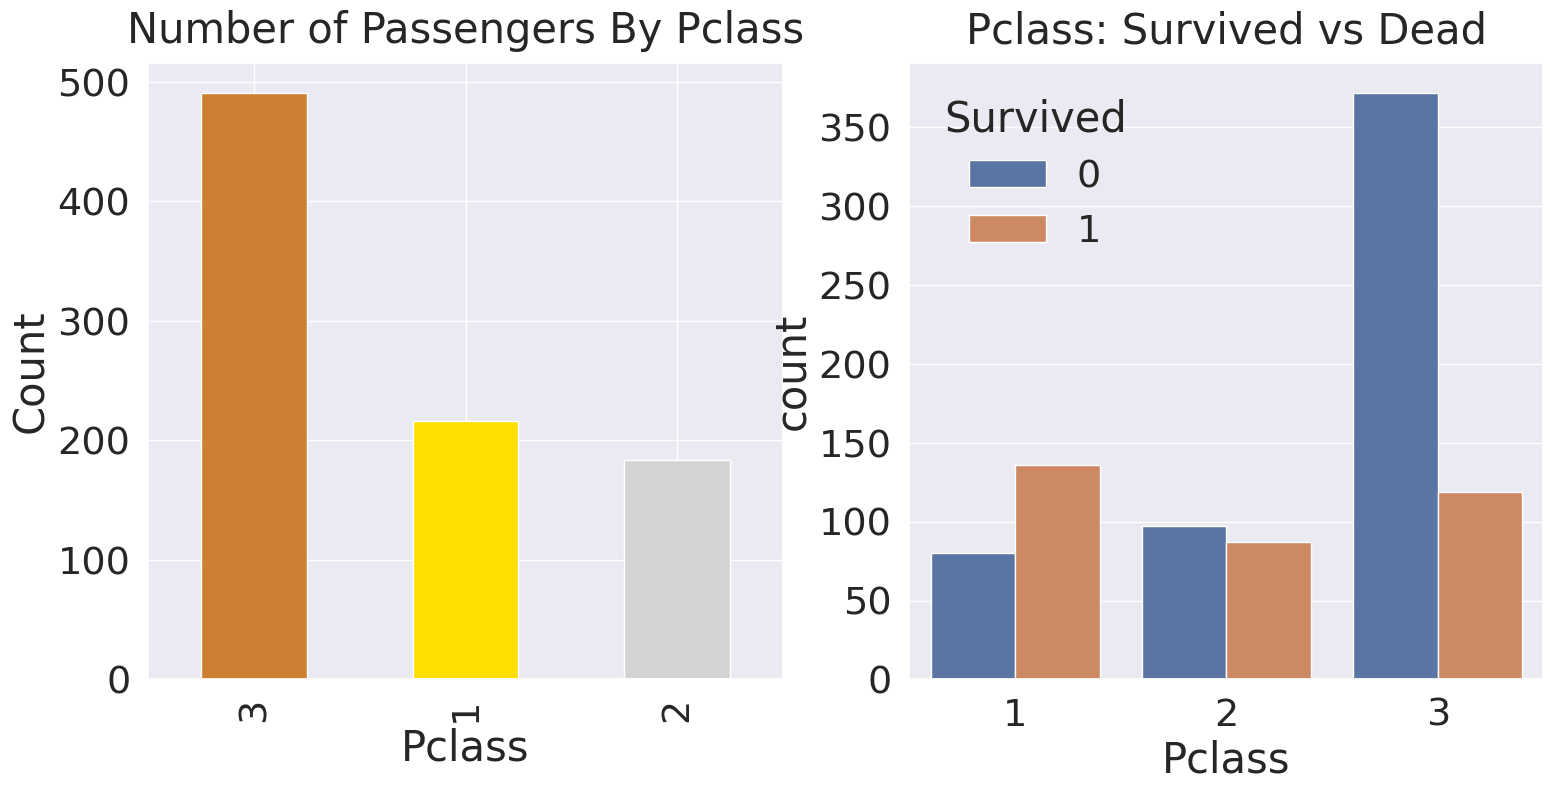

In [18]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- Pclass가 높을수록 생존 확률이 높은것을 확인.
- 추후에 모델을 생성할 때 해당 feature를 사용하는 것이 유용함을 확인.

## 2-2. Sex

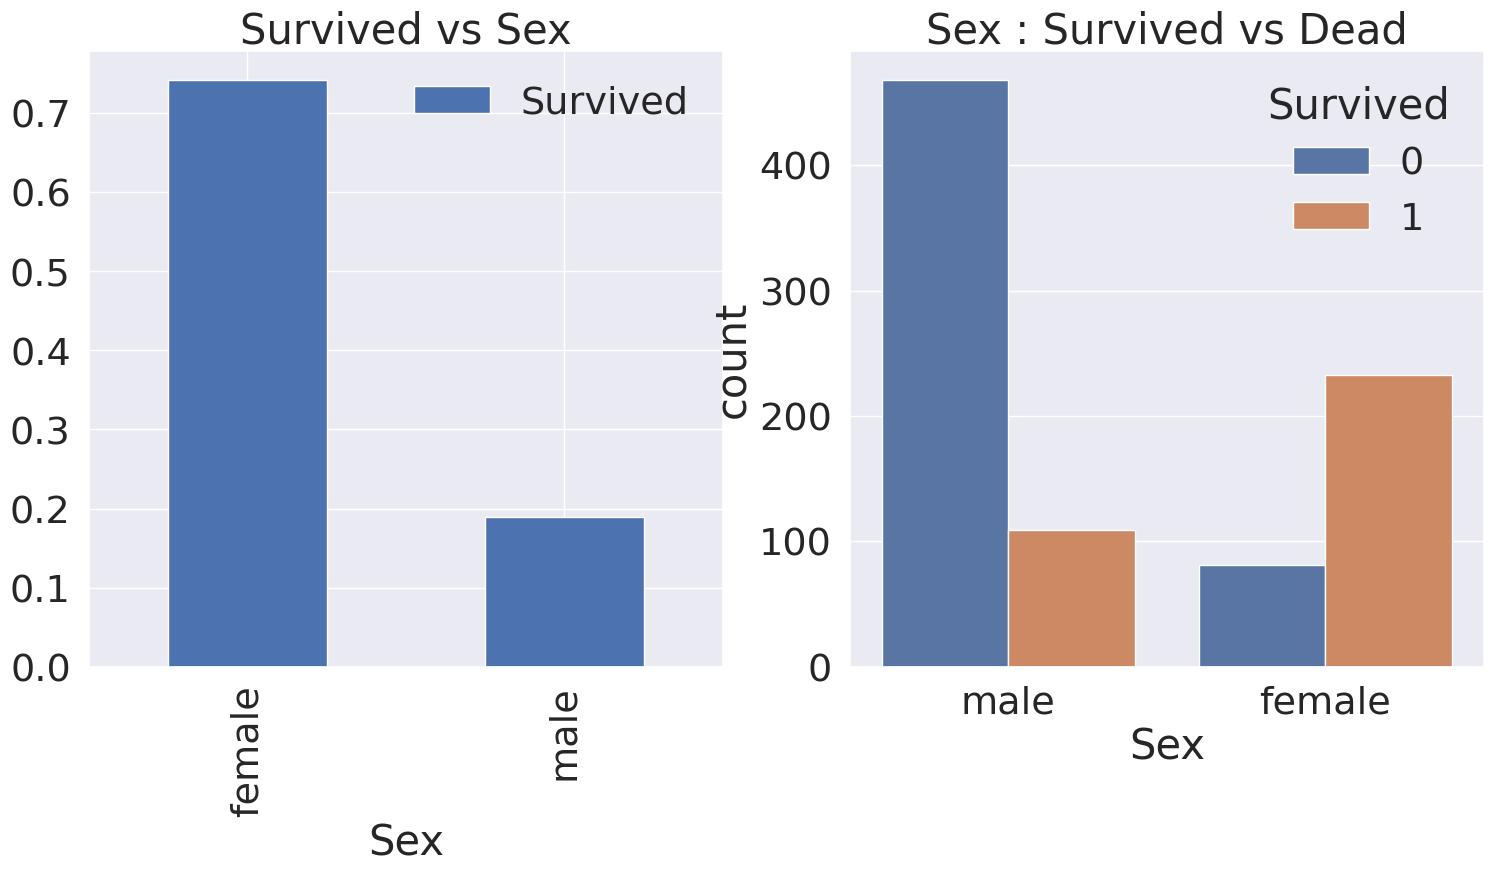

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived', data=df_train,ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

- 여성의 생존 확률이 높음.

In [20]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2-3. Both Sex and Pclass

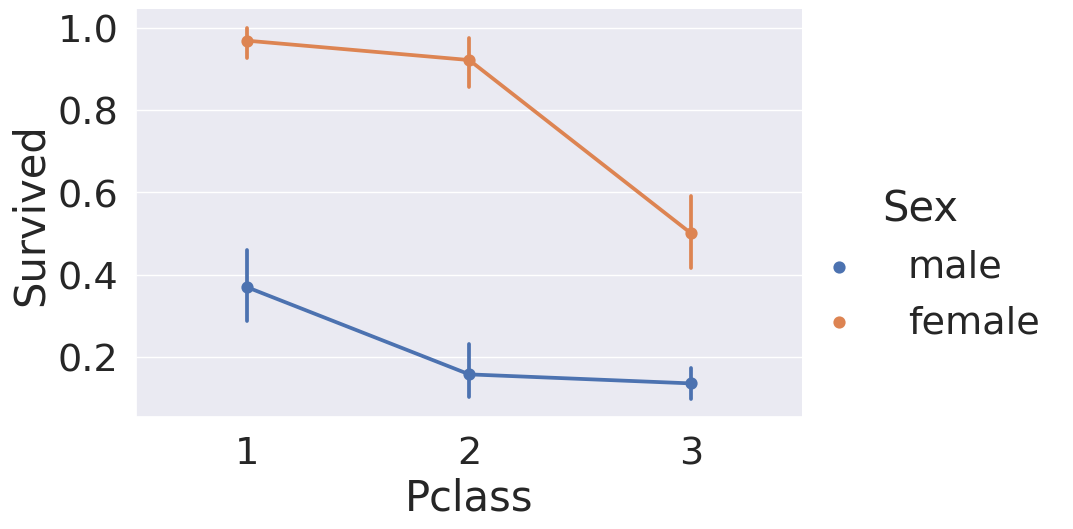

In [22]:
sns.catplot(x='Pclass',y='Survived',hue = 'Sex',data=df_train,kind='point',height=6,aspect=1.5)

# factorplot이 catplot으로 변경
# 3개의 차원으로 이루어진 그래프를 그릴 수 있음.
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 class에서 female이 male보다 생존 확률이 높은 것을 알 수 있음.
- 남, 녀 상관없이 클래스가 높을수록 생존 확률이 높음.

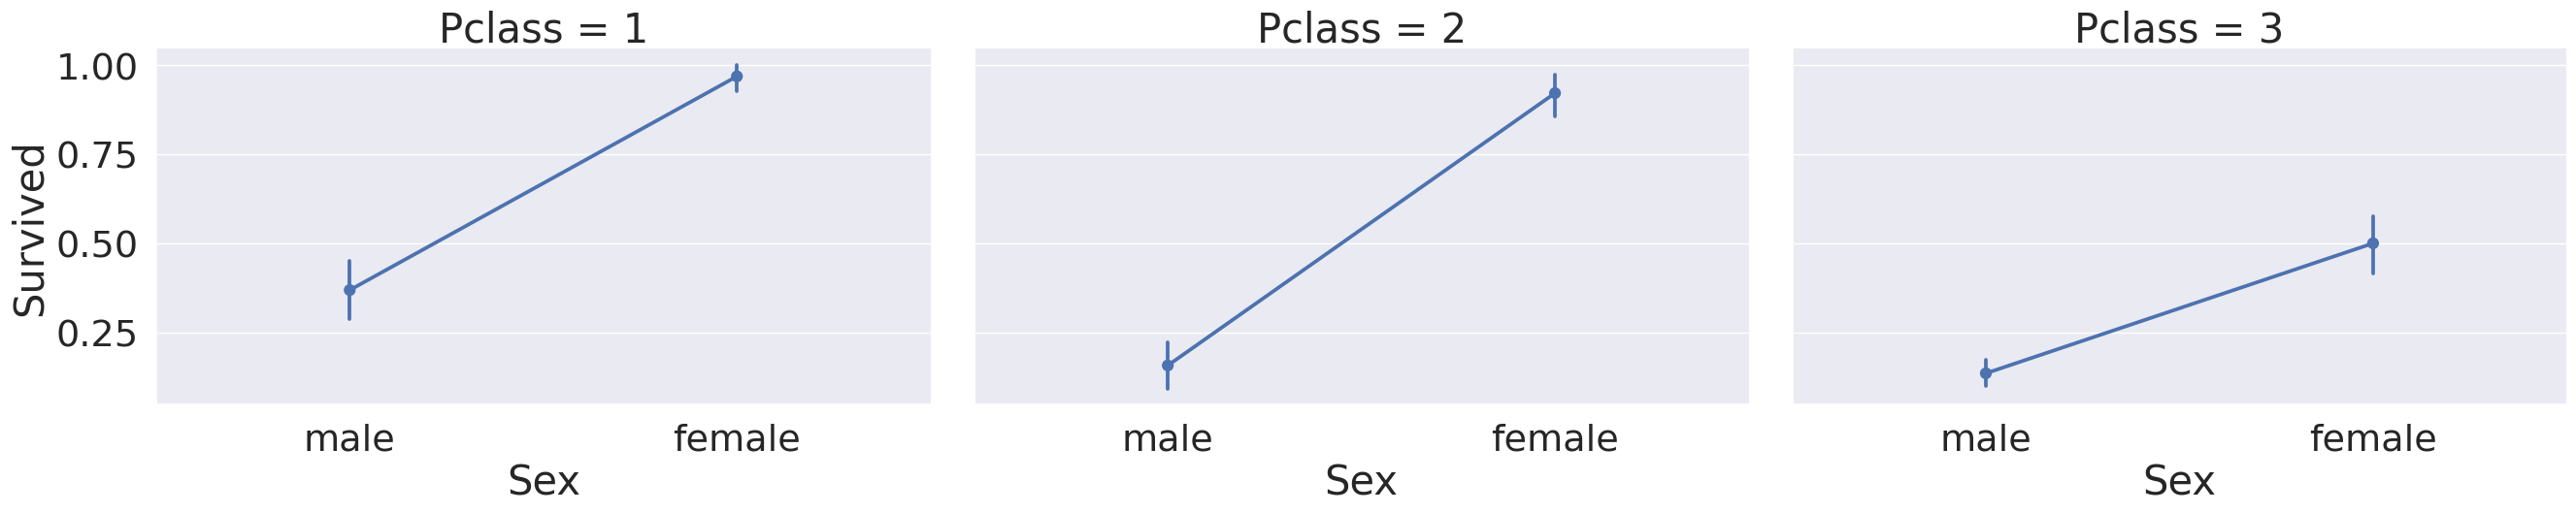

In [23]:
sns.catplot(x='Sex',y='Survived',col='Pclass',data=df_train,kind='point',height=6,aspect=1.5)

## 2-4. Age

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객의 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객의 평균 나이 : 29.7 Years


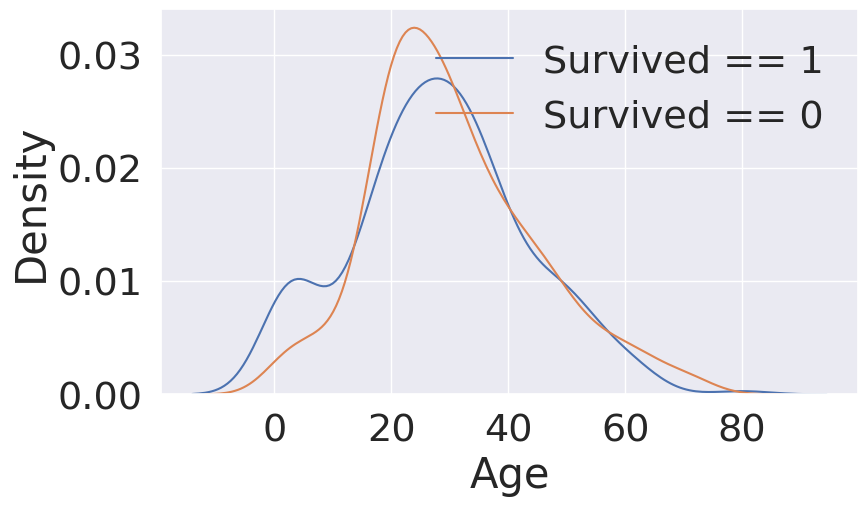

In [25]:
# Age Histogram

fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음.

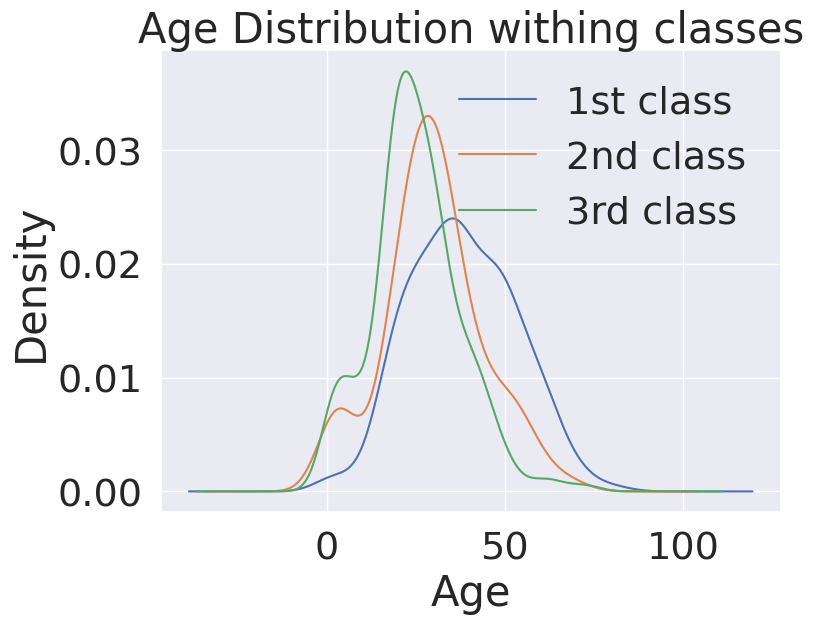

In [26]:
# Age distribution withing classes

plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution withing classes')
plt.legend(['1st class','2nd class','3rd class'])

- class가 높을 수록 나이 많은 사람의 비중이 커짐.
- 나이대에 따른 생존 확률 확인할 필요가 있음.

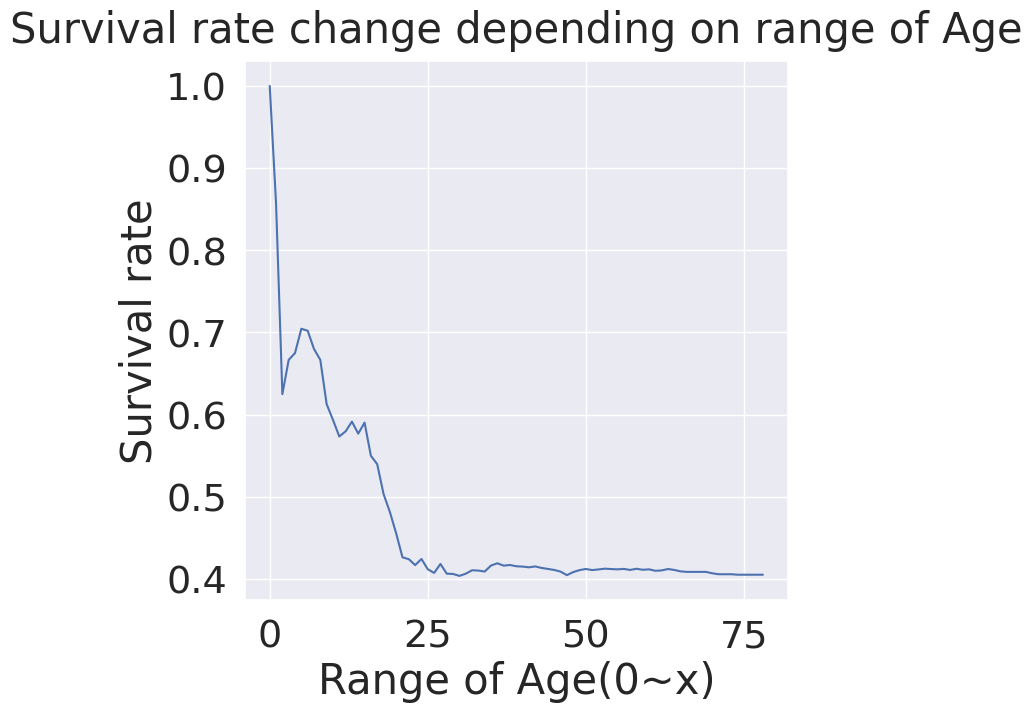

In [27]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',  y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 높음.
- 나이가 중요한 feature로 쓰일 수 있음을 확인.

## 2.5 Pclass, Sex, Age

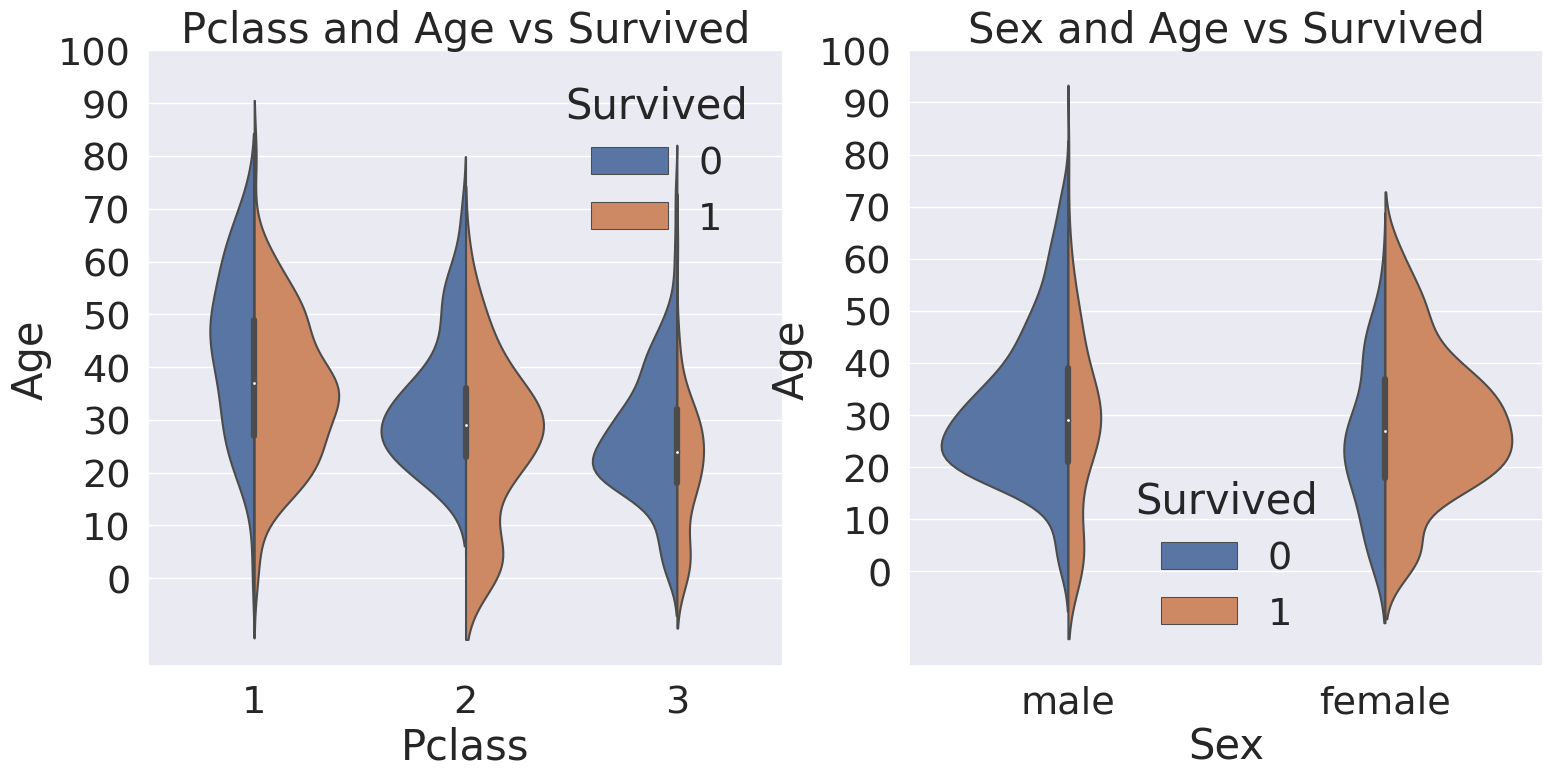

In [28]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x ="Sex",y="Age",hue="Survived",data=df_train,scale="count",split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 여성과 아이의 생존률이 높은 것으로 확인.

## 2-6. Embarked

<Axes: xlabel='Embarked'>

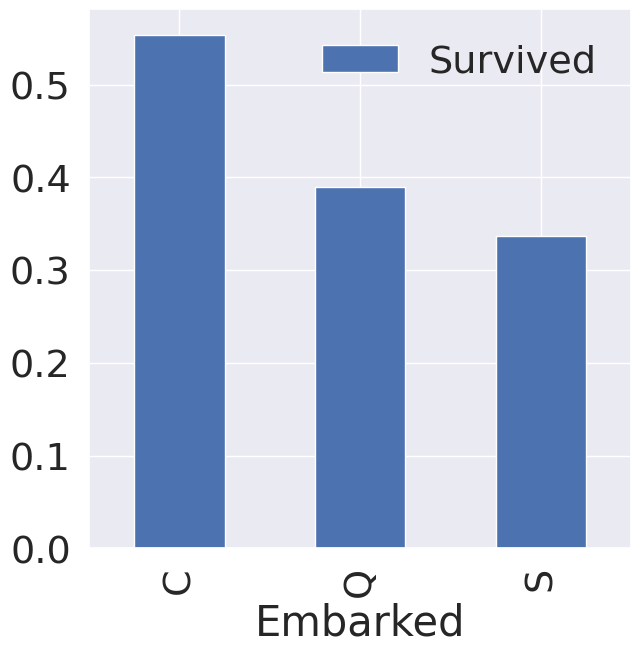

In [29]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

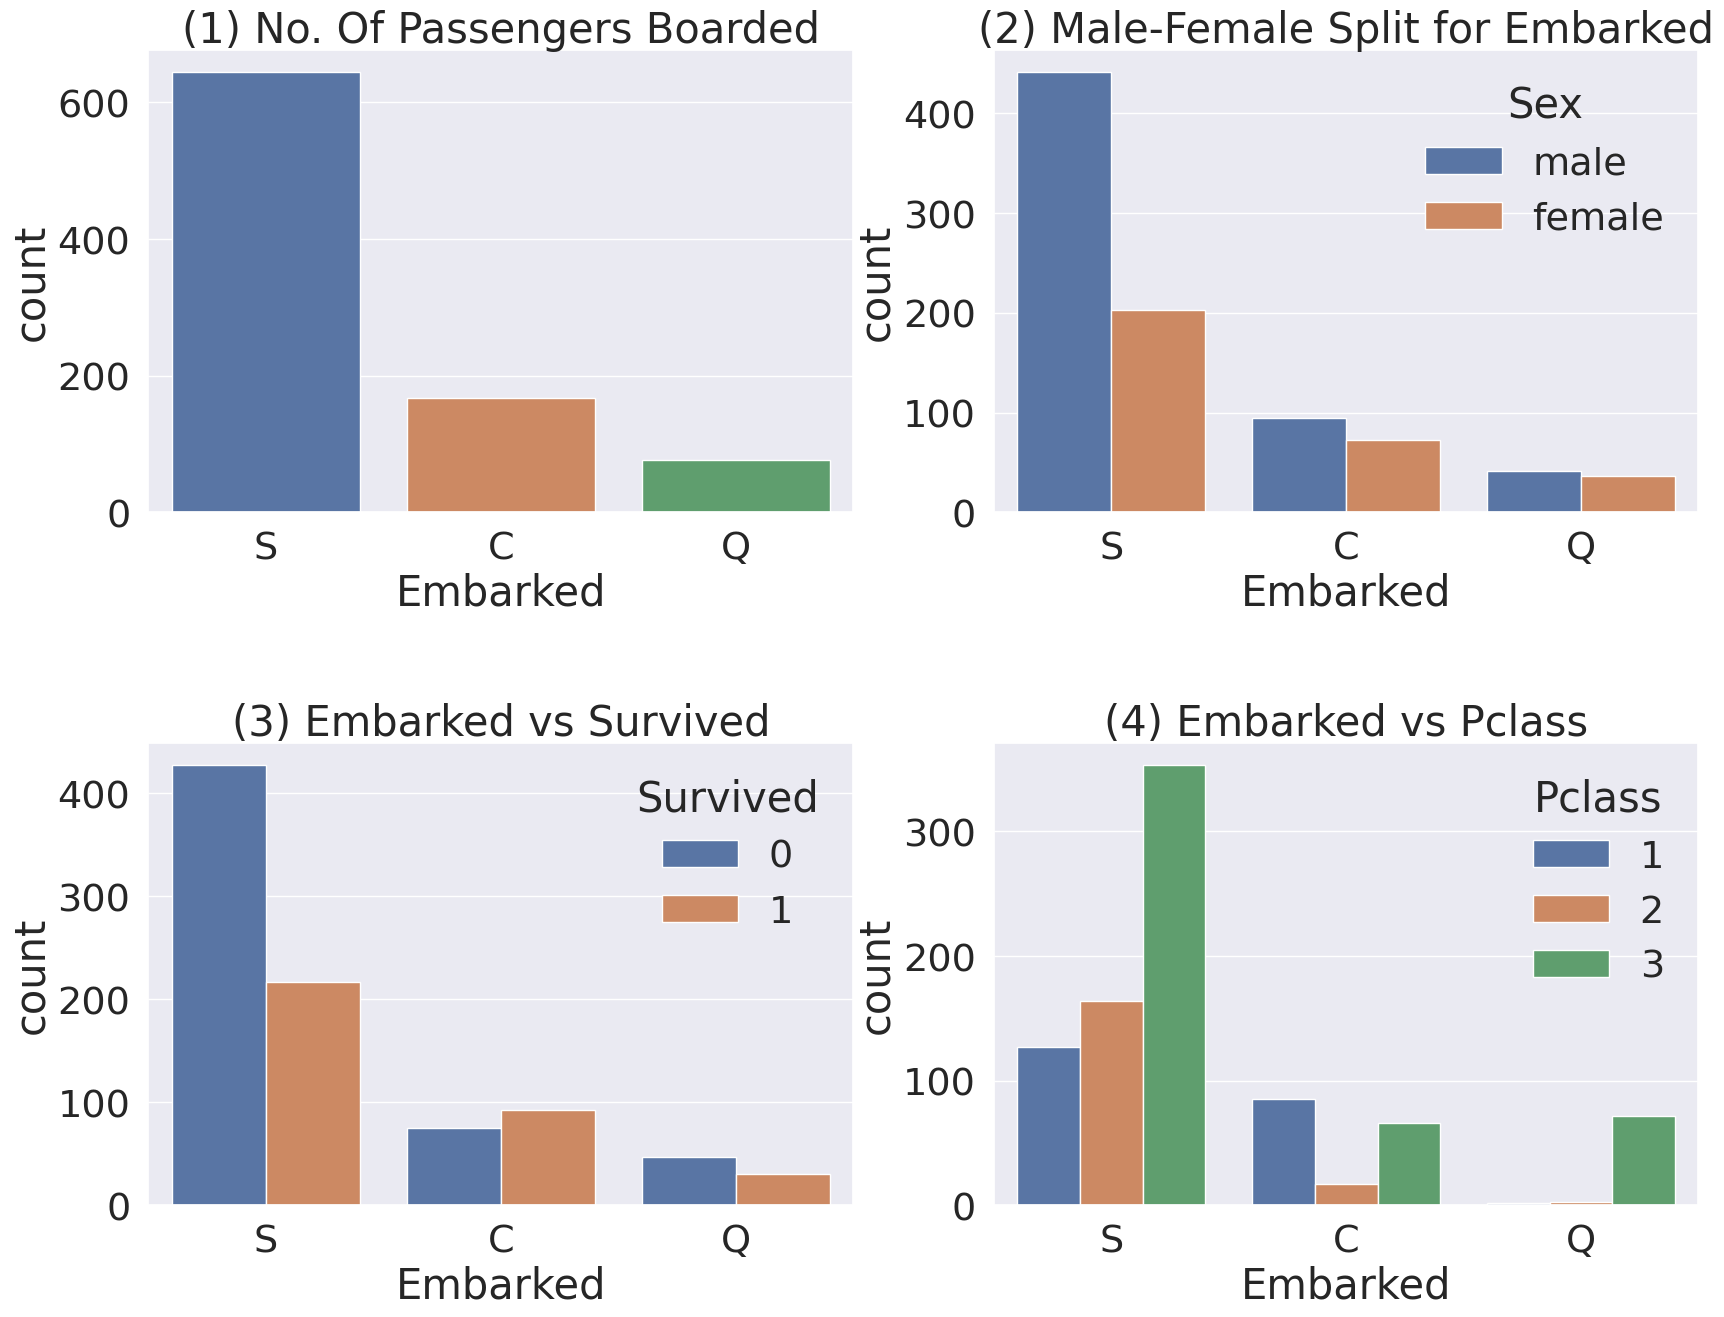

In [30]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x = 'Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue = 'Sex', data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue = 'Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 S에서 가장 많은 승객이 탑승
- Figure(2) - C,Q는 남녀의 비율이 비슷함, S는 남자의 비율이 훨씬 많음
- Figure(3) - 생존확률이 S의 경우 많이 낮은 것을 볼 수 있음.
- Figure(4) - Class로 Split 해서 보았을 때, C가 생존확률이 높은 이유는 클래스가 높은 사람이 많이 탑승 했기 때문임. S는 3rd Class가 많아서 생존확률이 낮게 나옴.

## 2-7. Family - SibSq(형제 자매) + Parch(부모, 자녀)

In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신 포함.
df_test['FaimlySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신 포함.

In [32]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


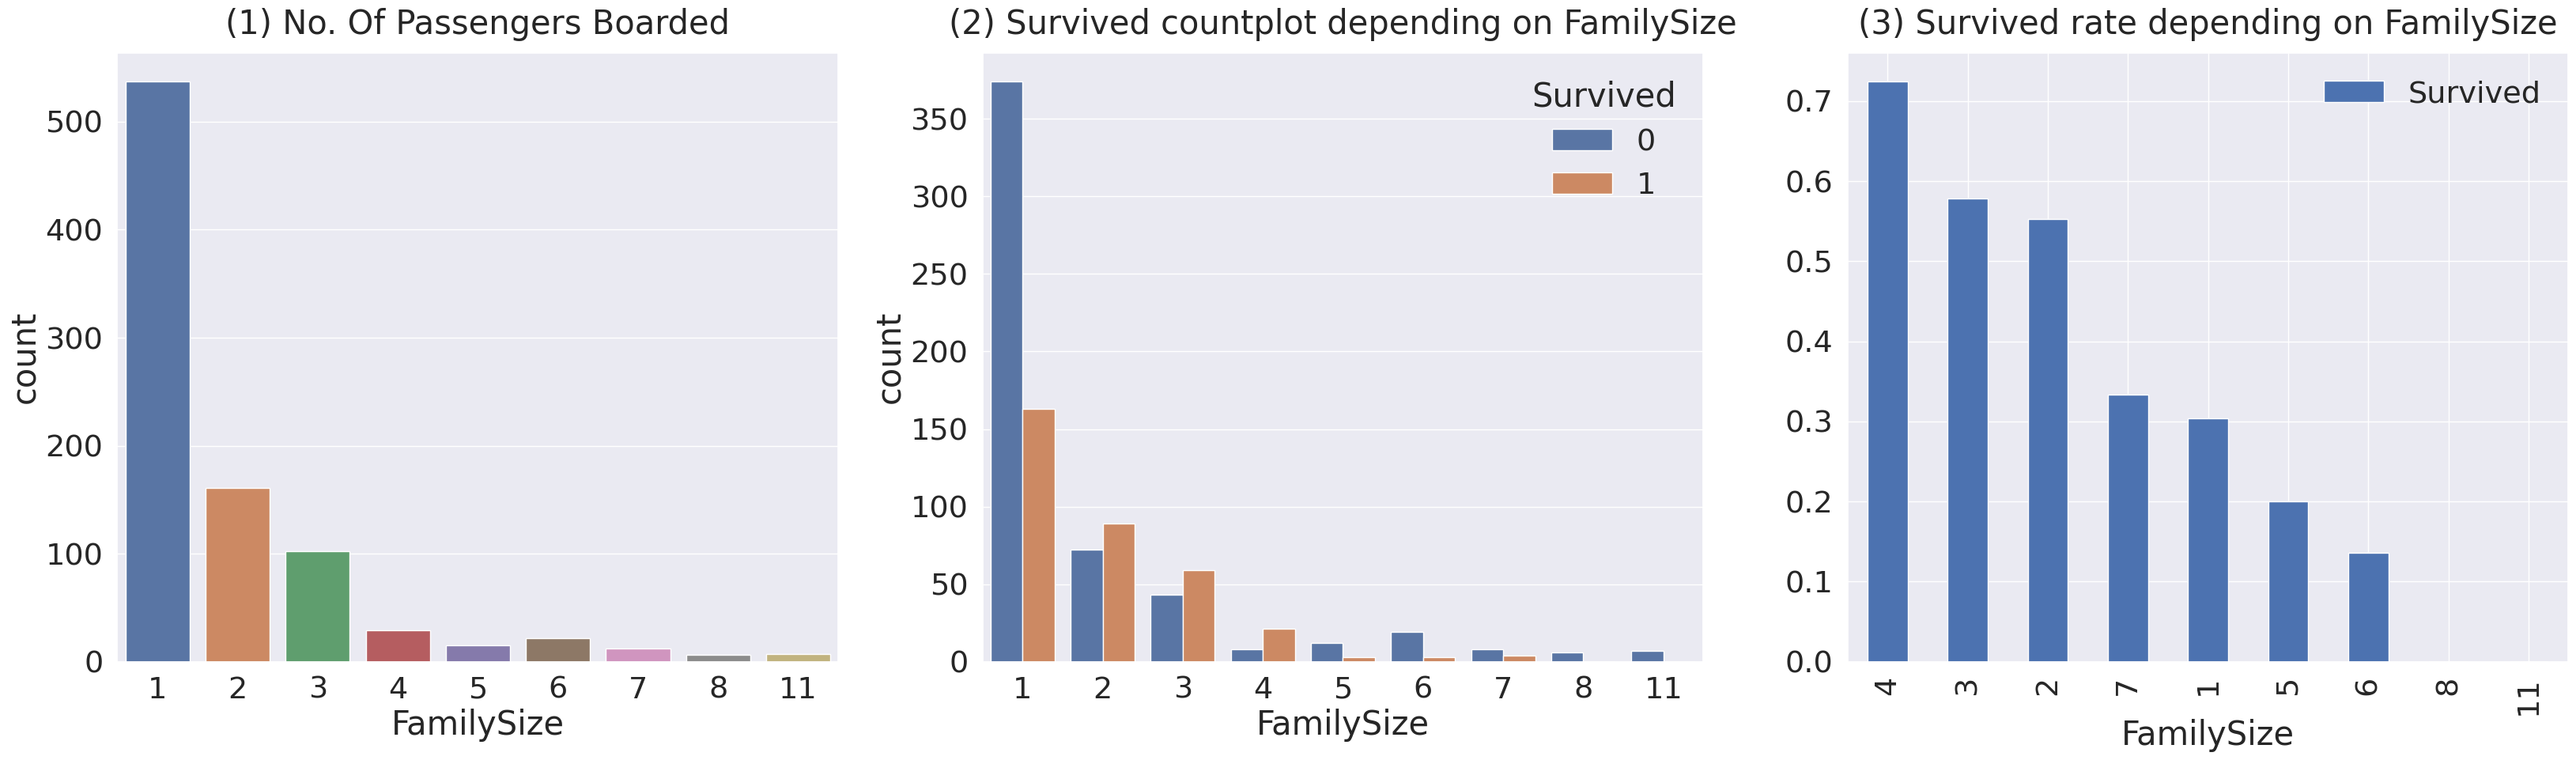

In [33]:
f, ax= plt.subplots(1,3,figsize=(40,10))
sns.countplot(x='FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded',y=1.02)

sns.countplot(x='FamilySize', hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- Figure(1) - 가족크기가 1~11명까지 있음. 대부분이 1명
- Figure(2),(3) - 가족크기에 따른 생존비교. 4명인 경우 가장 생존확률이 높음. 가족수가 너무 적어도 너무 커도 생존 확률이 낮음.

## 2-8. Fare

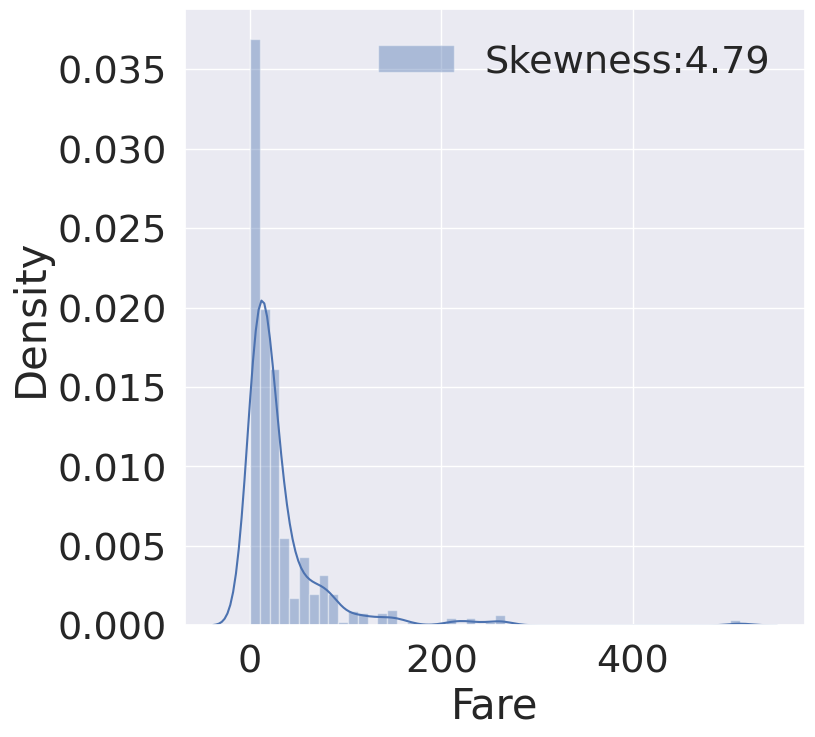

In [34]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭. (왜도가 높음) 이대로 모델에 적용한다면 모델이 학습을 잘 못할수도 있음.
- outlier의 영향을 줄이기 위해 Fare에 log를 취함.

In [35]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean() # testset에 있는 nan value 평균값으로 치환
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

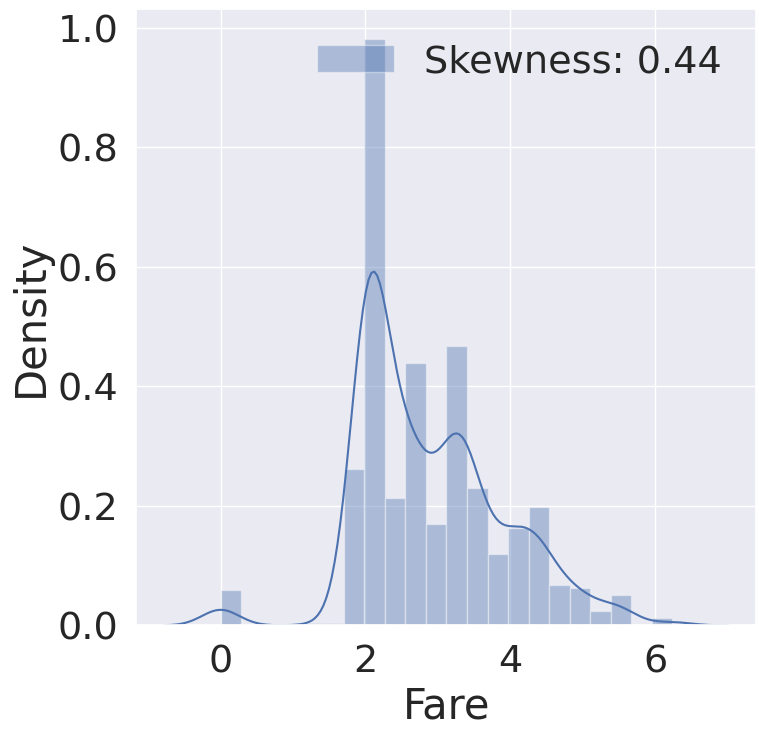

In [36]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- log를 사용하여 비대칭성이 많이 사라진 것을 확인.

## 2-9. Cabin

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [38]:
df_train.isna().sum()/df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
FamilySize     0.000000
dtype: float64

- Cabin의 NaN비율이 80% 가까이 되기 때문에 포함시키지 않도록 함.

## 2-10. Ticket

In [39]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

- String 데이터이고 value의 값이 많기 때문에 사용방안이 필요함.

# 3. Feture Engineering

## 3-1. Fill Null

### 3-1-1. Fill Null in Ag using title


- Age 에는 null data가 177개 존재.
- title과 statistics를 사용해서 null 값을 채우도록 함.
- 영어이름의 Miss, Mrr, Mrs 등의 title를 사용.

In [40]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

# extract 정규표현식 적용

In [41]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [43]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [44]:
df_train.groupby('Initial').mean(numeric_only=True) # 설정 필요.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- 여성과 관계있는 Miss, Mrs의 생존률이 높은 것으로 확인됨.

<Axes: xlabel='Initial'>

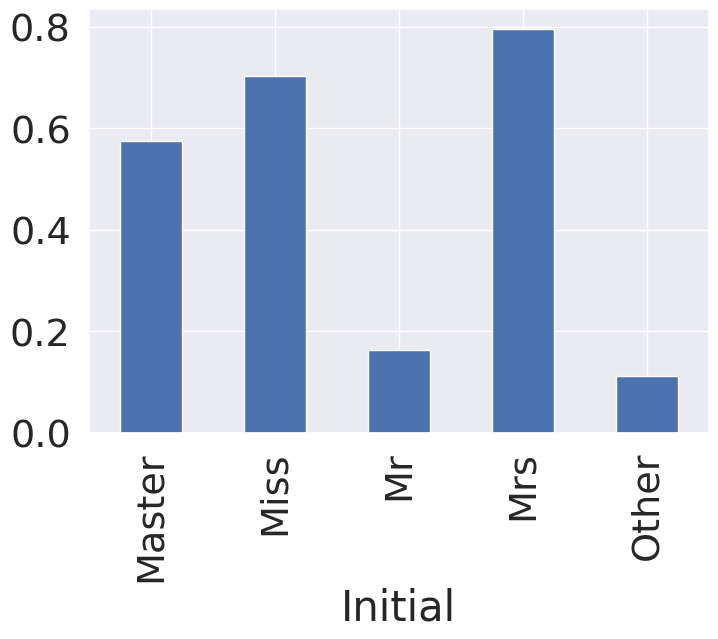

In [45]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [46]:
df_train.groupby('Initial').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해 Null Value Fill

In [47]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

### 3-1-2. Fill Null in Embarked

In [48]:
print('Embarked has',sum(df_train['Embarked'].isnull()),'Null Values')

Embarked has 2 Null Values


In [49]:
# Null value가 2개뿐이기 때문에 가장 많은 값으로 채움.
df_train['Embarked'].fillna('S',inplace=True)

## 3-2. Change Age(continuous to categorical)

- Age를 그룹화 해서 categorical화.
- categorical화 할 경우 information loss가 생길 수도 있음.

In [50]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [51]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [52]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [53]:
df_train.drop(['Age','Age_cat_2'],axis =1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

## 3-3. Change Initial, Embarked and Sex(string to numerical)

- 5개로 이루어진 Initial을 수치화 해줘야함.
- map method사용.

In [54]:
df_train['Initial'] = df_train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

- C, Q, S로 이루어진 Embarked도 변환.

In [55]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [57]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

- Female, Male로 이루어진 Sex도 수치화.

In [58]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

* 각 Feature간의 상관관계 구하기. 두 변수간의 Pearson Correlation사용.
* heatmap plot 사용하면 편하게 그릴 수 있음.

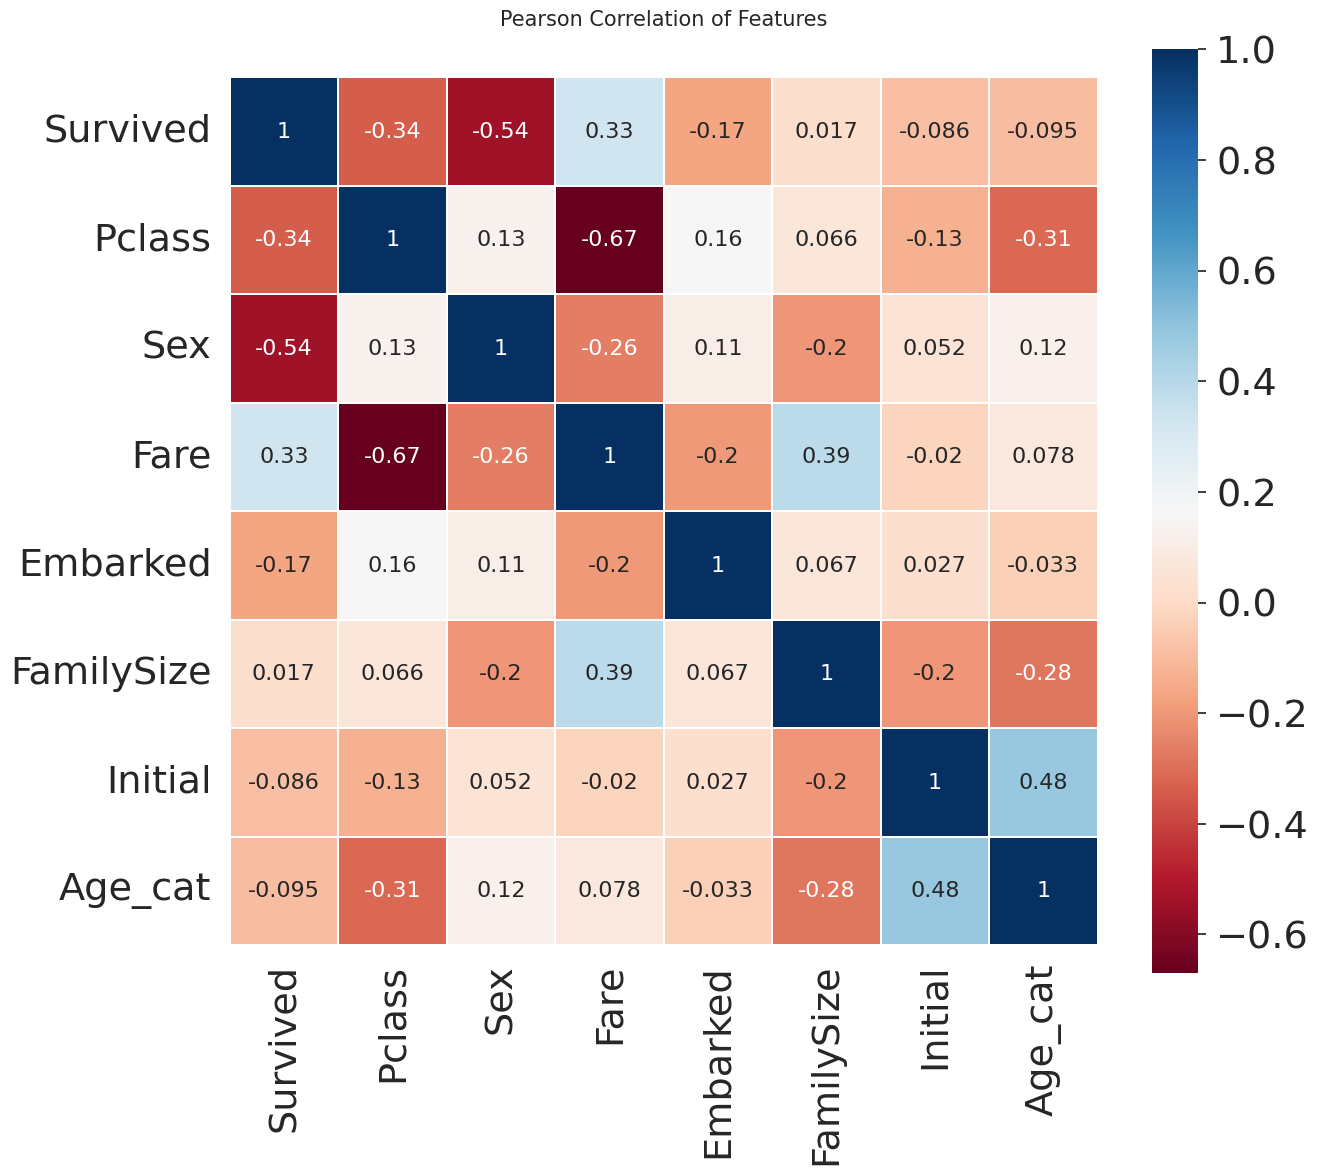

In [59]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05,size=15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square = True,
            cmap = colormap, linecolor = 'white',annot = True, annot_kws={'size':16})

del heatmap_data

- Sex, Pclass가 Survived에 상관관계가 어느정도 있음을 확인.
- Fare와 Embarked도 상관관계가 있음.
- 서로 강한 상관관계를 가지는 feature들이 없음.

## 3-4. One-hot Encoding on Initial and Embarked

In [60]:
df_train = pd.get_dummies(df_train, columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')

In [61]:
df_train.head()

# Pandas버전이 업데이트 됨에 따라 True/False로 값이 나옴.
# 여전히 0과 1로 동일한 의미를 가지기 때문에 모델 학습이나 데이터 처리에는 영향을 미치지 않음.

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False


In [62]:
df_train = pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,False,False,True,False,False,False,False,True


## 3-5. Drop Columns

In [64]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis = 1,inplace= True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis = 1,inplace= True)

In [65]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


In [66]:
df_test.head()

,Pclass,Sex,Fare,FaimlySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,False,False,True,False,False,False,True,False
1,3,0,1.945910,2,4,False,False,False,True,False,False,False,True
2,2,1,2.270836,1,6,False,False,True,False,False,False,True,False
3,3,1,2.159003,1,2,False,False,True,False,False,False,False,True
4,3,0,2.508582,3,2,False,False,False,True,False,False,False,True


# 4. Building machine learning model and prediction using the trained model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 평가
from sklearn.model_selection import train_test_split

- titanic 문제는 target class가 있으며 0, 1로 이루어진 이진 분류 문제임.

## 4-1. Preparation - Split dataset into train, valid, test set

In [68]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [69]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train,target_label,test_size=0.3,random_state=2018)

## 4-2. Model generation and prediction

In [70]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction = model.predict(X_vld)

In [71]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞춤


## 4-3. Feature importance

In [72]:
from pandas import Series

In [73]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance,index=df_test.columns)

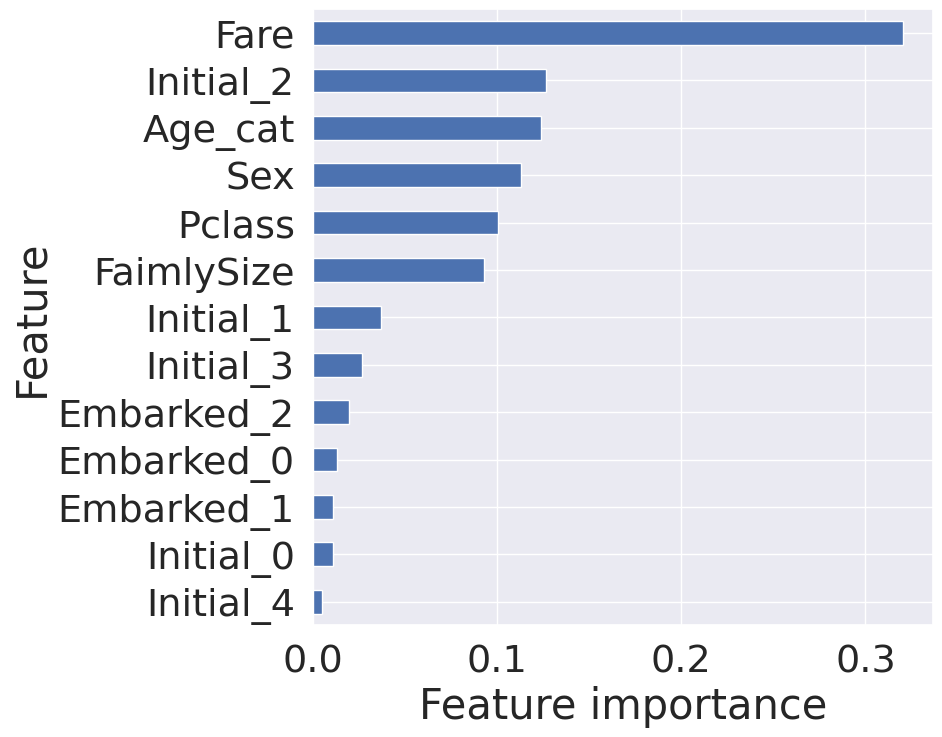

In [74]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- Fare가 가장 큰 영향력을 가지며 그 뒤로 Initial_2, Age_cat, Pclass가 차례로 중요도를 가짐.
- 다른 모델을 사용하게 되면 feature importance가 다르게 나올 수 있음.

## 4-4. Prediction on Test set

In [75]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [77]:
submission.to_csv('./submission.csv',index=False)